# Game Data Exploration and Analysis

### Index
* [Trends in games](#gametrends)
    * [Number of games by year](#gameyear)
    * [Number of games by month](#gamemonth)
    * [Geographical distribution of game developers](#gamedeveloper)
    
* [Factors affecting game ratings](#gamerating)
    * [Platforms](#gameplatform)
    * [Genres](#gamegenre)

In [83]:
# dependencies and setup
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import gmaps
import os
import datetime as dt

from api_keys import g_key

# Load and read file into dataframe
game_to_load = "csvfiles/game_final.csv"
game_df = pd.read_csv(game_to_load,parse_dates=["release date"])
game_df.head()

,name,id,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,...,metacritic score,yet,owned,beaten,toplay,dropped,playing,users,month,year
0,The Witcher 3: Wild Hunt,3328,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,...,93,562,6149,2405,455,424,593,9147,5,2015
1,Life is Strange,3439,9,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,...,83,466,6156,1916,184,343,124,8196,1,2015
2,Red Dead Redemption 2,28,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Adventure', 'Action']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,...,96,404,4230,1261,1143,219,588,6079,10,2018
3,DOOM (2016),2454,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,...,85,318,4868,1526,319,370,222,6616,5,2016
4,Fallout 4,3070,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,...,84,295,4844,1235,225,732,222,6301,11,2015


## Trends in games <a id='gametrends'></a>
The following section explores trends in games released over the past 5 years

In [4]:
game_df.describe()

,id,number of platforms,number of stores,number of genres,rating,max rating,rating count,metacritic score,yet,owned,beaten,toplay,dropped,playing,users,month,year
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,43046.670034,3.569024,3.132155,2.667508,3.540345,3.803030,190.570707,74.871212,56.936869,696.708754,101.590909,53.954545,55.015993,24.925084,823.224747,6.441919,2016.631313
std,80649.538918,1.833724,1.613510,1.135943,0.569404,0.830094,335.482475,9.587855,74.776647,865.895620,228.029789,110.838428,90.283233,55.423105,1078.106201,3.307467,1.351624
min,2.000000,1.000000,1.000000,1.000000,1.290000,1.000000,5.000000,27.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,2015.000000
25%,3344.250000,2.000000,2.000000,2.000000,3.180000,4.000000,20.000000,70.000000,10.000000,135.750000,6.000000,3.000000,7.000000,1.000000,160.000000,3.000000,2015.000000
50%,13164.000000,3.000000,3.000000,3.000000,3.570000,4.000000,58.500000,76.000000,29.000000,385.500000,22.000000,12.000000,20.000000,5.000000,441.000000,7.000000,2016.000000
75%,45357.500000,5.000000,4.000000,3.000000,3.980000,4.000000,202.250000,81.000000,70.000000,887.500000,84.000000,49.000000,62.250000,22.000000,984.250000,9.000000,2018.000000
max,401808.000000,12.000000,8.000000,7.000000,4.760000,5.000000,3479.000000,97.000000,562.000000,6156.000000,2405.000000,1143.000000,732.000000,593.000000,9147.000000,12.000000,2019.000000


### Number of games by year <a id='gameyear'></a>

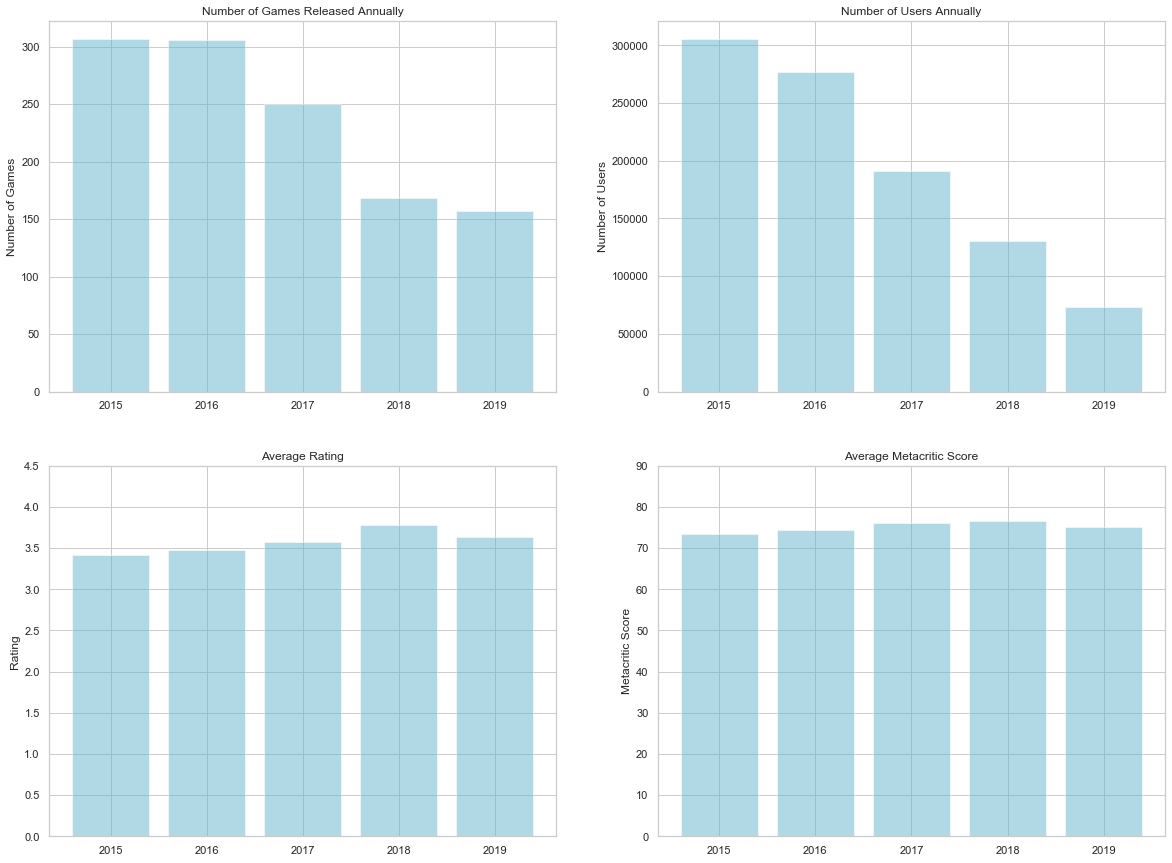

In [125]:
# Visualise category variables

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

# Generate a bar plot for total released each year

total = game_df.groupby(game_df["year"])["id"].count()

axes[0,0].set_title("Number of Games Released Annually")
axes[0,0].set_ylabel("Number of Games")

total = axes[0,0].bar(total.index, total, color='c', alpha=0.5)



# Generate a bar plot for total users each year
users = game_df.groupby(game_df["year"])["users"].sum()

axes[0,1].set_title("Number of Users Annually")
axes[0,1].set_ylabel("Number of Users")

users = axes[0,1].bar(users.index, users, color='c', alpha=0.5)


# Generate a bar plot for average rating each year
users = game_df.groupby(game_df["year"])["rating"].mean()
axes[1,0].set_title("Average Rating")
axes[1,0].set_ylim(top = 4.5)
axes[1,0].set_ylabel("Rating")

users = axes[1,0].bar(users.index, users, color='c', alpha=0.5)

# Generate a bar plot for average metacritic score each year
users = game_df.groupby(game_df["year"])["metacritic score"].mean()

axes[1,1].set_title("Average Metacritic Score")
axes[1,1].set_ylim(top = 90)
axes[1,1].set_ylabel("Metacritic Score")

users = axes[1,1].bar(users.index, users, color='c', alpha=0.5)
plt.savefig("figures/game_annualtrend.png")

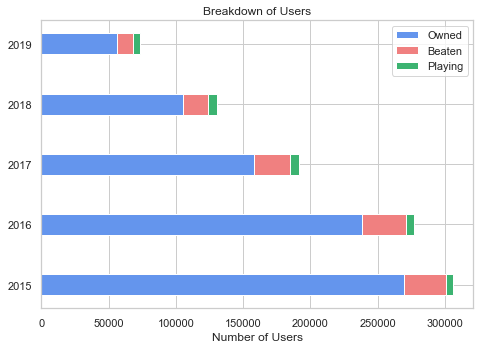

In [137]:
N = 5

years = game_df["year"].unique()  # the x locations for the groups
years.sort()


owned = game_df.groupby(game_df["year"]).owned.sum()
beaten = game_df.groupby(game_df["year"]).beaten.sum()
playing = game_df.groupby(game_df["year"]).playing.sum()
b = list(owned + beaten)


width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(years, owned, width, color="cornflowerblue")
ax.barh(years, beaten, width, left=owned, color="lightcoral")
ax.barh(years, playing, width, left=b, color="mediumseagreen")


ax.set_xlabel("Number of Users")
ax.set_title("Breakdown of Users")
ax.set_yticks(years, (years[0], years[1], years[2], years[3], years[4]))

ax.legend(labels=["Owned", "Beaten", "Playing"])

plt.savefig("figures/gameuser_annualtrend.png")

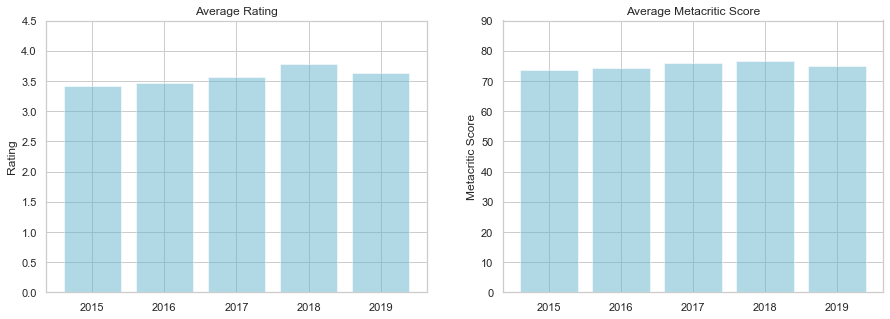

In [135]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

# Generate a bar plot for average rating each year
users = game_df.groupby(game_df["year"])["rating"].mean()
axes[0].set_title("Average Rating")
axes[0].set_ylim(top = 4.5)
axes[0].set_ylabel("Rating")

rating = axes[0].bar(users.index, users, color='c', alpha=0.5)

# Generate a bar plot for average metacritic score each year
users = game_df.groupby(game_df["year"])["metacritic score"].mean()

axes[1].set_title("Average Metacritic Score")
axes[1].set_ylim(top = 90)
axes[1].set_ylabel("Metacritic Score")

metascore = axes[1].bar(users.index, users, color='c', alpha=0.5)

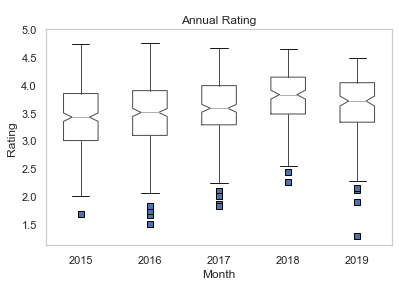

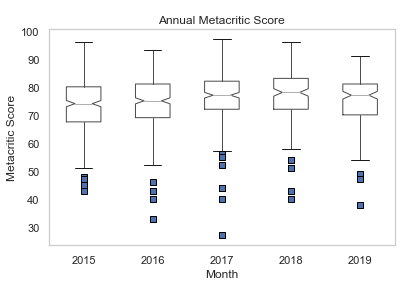

In [138]:
# Generate a box plot for range of ratings each year
blue_square = dict(markerfacecolor='b', marker='s')
years = game_df["year"].unique()
years.sort()


game_df.boxplot(column=["rating"], by="year", notch = True, labels = years, grid=False, flierprops=blue_square)

plt.xlabel("Month")
plt.ylabel("Rating")
title_boxplot = "Annual Rating"
plt.title(title_boxplot)
plt.ylim(top = 5)
plt.suptitle(" ")

# Generate a box plot for range of metacritic score each year

blue_square = dict(markerfacecolor='b', marker='s')
years = game_df["year"].unique()
years.sort()

game_df.boxplot(column=["metacritic score"], by="year", notch = True, 
                           labels = years, grid=False, flierprops=blue_square)


plt.xlabel("Month")
plt.ylabel("Metacritic Score")
title_boxplot = "Annual Metacritic Score"

plt.title(title_boxplot)
plt.suptitle(" ")

plt.savefig("figures/gamerating_annualtrend.png")

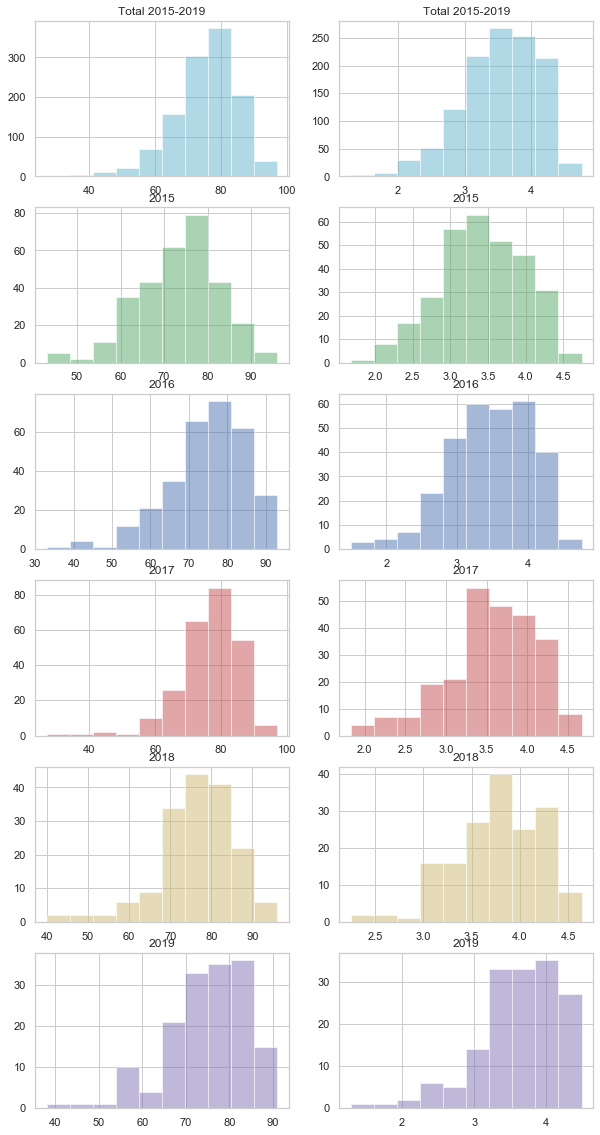

In [130]:
# Visualize metacritic score:

fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (10,20))


x00 = game_df['metacritic score']
x01 = game_df['rating']
x10 = game_df.loc[game_df["year"] == 2015]['metacritic score']
x11 = game_df.loc[game_df["year"] == 2015]['rating']
x20 = game_df.loc[game_df["year"] == 2016]['metacritic score']
x21 = game_df.loc[game_df["year"] == 2016]['rating']
x30 = game_df.loc[game_df["year"] == 2017]['metacritic score']
x31 = game_df.loc[game_df["year"] == 2017]['rating']
x40 = game_df.loc[game_df["year"] == 2018]['metacritic score']
x41 = game_df.loc[game_df["year"] == 2018]['rating']
x50 = game_df.loc[game_df["year"] == 2019]['metacritic score']
x51 = game_df.loc[game_df["year"] == 2019]['rating']


barplot00 = axes[0,0].hist(x00, alpha=0.5, bins=10, color='c', label="Total")
axes[0,0].set_title("Total 2015-2019")
barplot01 = axes[0,1].hist(x01, alpha=0.5, bins=10, color='c', label="Total")
axes[0,1].set_title("Total 2015-2019")

barplot10 = axes[1,0].hist(x10, alpha=0.5, bins=10, color='g', label="2015")
axes[1,0].set_title("2015")
barplot11 = axes[1,1].hist(x11, alpha=0.5, bins=10, color='g', label="2015")
axes[1,1].set_title("2015")


barplot20 = axes[2,0].hist(x20, alpha=0.5, bins=10, color='b', label="2016")
axes[2,0].set_title("2016")
barplot21 = axes[2,1].hist(x21, alpha=0.5, bins=10, color='b', label="2016")
axes[2,1].set_title("2016")

barplot30 = axes[3,0].hist(x30, alpha=0.5, bins=10, color='r', label="2017")
axes[3,0].set_title("2017")
barplot31 = axes[3,1].hist(x31, alpha=0.5, bins=10, color='r', label="2017")
axes[3,1].set_title("2017")

barplot40 = axes[4,0].hist(x40, alpha=0.5, bins=10, color='y', label="2018")
axes[4,0].set_title("2018")
barplot41 = axes[4,1].hist(x41, alpha=0.5, bins=10, color='y', label="2018")
axes[4,1].set_title("2018")

barplot50 = axes[5,0].hist(x50, alpha=0.5, bins=10, color='m', label="2018")
axes[5,0].set_title("2019")
barplot51 = axes[5,1].hist(x51, alpha=0.5, bins=10, color='m', label="2018")
axes[5,1].set_title("2019")

plt.show()


### Number of games by month <a id='gamemonth'></a>

In [131]:
# Drill down to games released by year
years = game_df["year"].unique()
years.sort()
months = game_df["month"].unique()
months.sort()

months_df = pd.DataFrame(0, index=np.arange(len(months)+1), columns=years)
total = months_df.sum()

# Create annual by month dataframe
for year in years:  
    current_yr = game_df.loc[game_df["year"] == year]
    months_df[year] = pd.DataFrame(current_yr.groupby(["month"])["id"].count())
    
months_df = months_df.dropna()

total = months_df.sum()


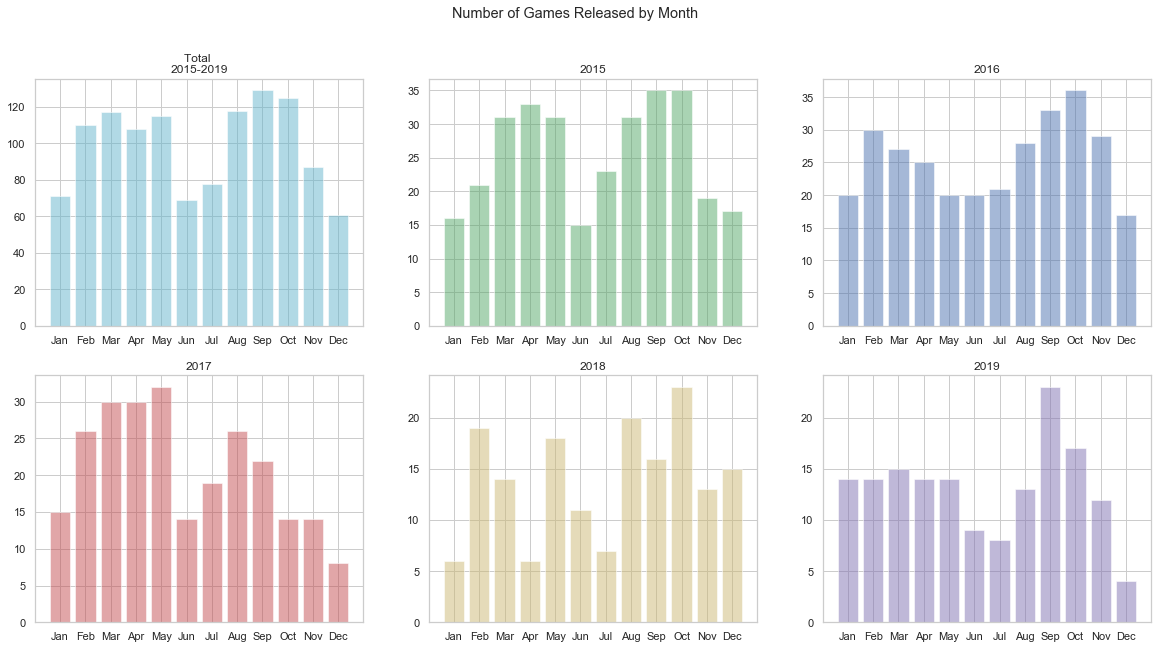

In [139]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))
fig.suptitle("Number of Games Released by Month")

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep","Oct","Nov","Dec"]

#plt.title("Number of Games Released by Month")
all_years = game_df.groupby(["month"])["id"].count()
barplot0 = axes[0,0].bar(months, all_years, color='c', alpha=0.5)
axes[0,0].set_title('Total \n2015-2019')

year1 = months_df[2015]
barplot1 = axes[0,1].bar(months, year1, color='g', alpha=0.5)
axes[0,1].set_title('2015')

year2 = months_df[2016]
barplot2 = axes[0,2].bar(months, year2, color='b', alpha=0.5)
axes[0,2].set_title('2016')

year3 = months_df[2017]
barplot3 = axes[1,0].bar(months, year3, color='r', alpha=0.5)
axes[1,0].set_title('2017')

year4 = months_df[2018]
barplot4 = axes[1,1].bar(months, year4, color='y', alpha=0.5)
axes[1,1].set_title('2018')

year5 = months_df[2019]
barplot5 = axes[1,2].bar(months, year5, color='m', alpha=0.5)
axes[1,2].set_title('2019')

plt.savefig("figures/game_monthlytrend.png")

In [19]:
corr = game_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,number of platforms,number of stores,number of genres,rating,max rating,rating count,metacritic score,yet,owned,beaten,toplay,dropped,playing,users,month,year
id,1.000000,-0.109314,-0.073723,-0.142900,0.120120,0.104115,-0.085707,0.059424,-0.123683,-0.173915,-0.065115,0.117407,-0.113098,0.007978,-0.153045,0.106714,0.569216
number of platforms,-0.109314,1.000000,0.794889,0.285847,0.023985,0.016134,0.080203,0.042745,0.189957,0.185606,0.045678,-0.026973,0.161130,0.032889,0.160424,-0.004408,-0.114809
number of stores,-0.073723,0.794889,1.000000,0.304836,0.069292,0.048385,0.134550,0.027295,0.271074,0.204458,0.105347,0.092792,0.183129,0.074836,0.190343,0.033249,0.039744
number of genres,-0.142900,0.285847,0.304836,1.000000,-0.146065,-0.124012,-0.089991,-0.061872,-0.027641,-0.013644,-0.108830,-0.089180,-0.025265,-0.063021,-0.037217,-0.034182,-0.107892
rating,0.120120,0.023985,0.069292,-0.146065,1.000000,0.792272,0.369732,0.612237,0.293936,0.208202,0.383698,0.395677,0.216513,0.383812,0.268107,0.043583,0.183956
max rating,0.104115,0.016134,0.048385,-0.124012,0.792272,1.000000,0.274713,0.497492,0.244564,0.164564,0.285163,0.293480,0.156487,0.289921,0.207391,0.030811,0.122187
rating count,-0.085707,0.080203,0.134550,-0.089991,0.369732,0.274713,1.000000,0.365189,0.789389,0.850500,0.934715,0.685489,0.770500,0.814036,0.922640,-0.008194,-0.020281
metacritic score,0.059424,0.042745,0.027295,-0.061872,0.612237,0.497492,0.365189,1.000000,0.346690,0.294205,0.340679,0.338048,0.276339,0.383831,0.328084,0.036040,0.085265
yet,-0.123683,0.189957,0.271074,-0.027641,0.293936,0.244564,0.789389,0.346690,1.000000,0.856972,0.726230,0.598672,0.638108,0.584598,0.871946,-0.027829,-0.059370
owned,-0.173915,0.185606,0.204458,-0.013644,0.208202,0.164564,0.850500,0.294205,0.856972,1.000000,0.714568,0.449403,0.826339,0.608709,0.985594,-0.007845,-0.183080


### Geographical distribution of game developers <a id='gamedeveloper'></a>

In [26]:
# load the required developer csv
developer_df=pd.read_csv("csvfiles/developers.csv")

Text(0, 0.5, 'Frequency')

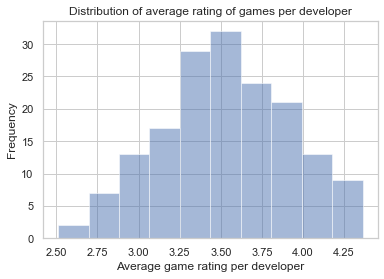

In [133]:
# exploring game ratings by developer
dev_gamecount=pd.DataFrame(developer_df.groupby("first dev")["rating"].agg(["count","mean","median","var","std","sem"]))
dev_gamecount=dev_gamecount.sort_values("count",ascending=False)
dev_gamecount=dev_gamecount[dev_gamecount["count"]>1]
dev_gamecount["average rating count"]=developer_df.groupby("first dev")["rating count"].mean()

plt.hist(dev_gamecount["mean"],align="left",alpha=0.5)
plt.title("Distribution of average rating of games per developer")
plt.xlabel("Average game rating per developer")
plt.ylabel("Frequency")

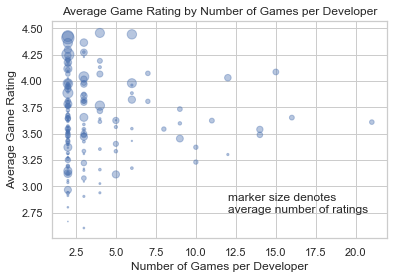

In [140]:
plt.scatter(dev_gamecount["count"],dev_gamecount["mean"],s=dev_gamecount["average rating count"]/10,alpha=0.4)
plt.title("Average Game Rating by Number of Games per Developer")
plt.xlabel("Number of Games per Developer")
plt.ylabel("Average Game Rating")
plt.annotate("marker size denotes\naverage number of ratings",(12,2.75))
plt.savefig("figures/game_developer.png")

Text(0, 0.5, 'Frequency')

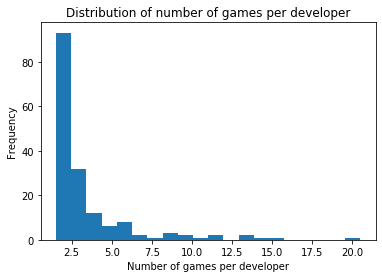

In [31]:
# exploring the number of games released by each developer between 2015-2019
plt.hist(dev_gamecount["count"],align="left",bins=20)
plt.title("Distribution of number of games per developer")
plt.xlabel("Number of games per developer")
plt.ylabel("Frequency")

In [32]:
# obtaining the location of each developer's office using google maps
lat=[]
lng=[]

params={
    "inputtype":"textquery",
    "key":g_key,
}

for i in dev_gamecount.index:
    params["input"]=i
    url="https://maps.googleapis.com/maps/api/place/autocomplete/json?parameters"
    response=requests.get(url, params=params).json()
    try:
        place_id=response["predictions"][0]["place_id"]
        url2="https://maps.googleapis.com/maps/api/geocode/json?place_id="+place_id+"&key="+g_key
        response2=requests.get(url2).json()
        lat.append(response2["results"][0]["geometry"]["location"]["lat"])
        lng.append(response2["results"][0]["geometry"]["location"]["lng"])
    except:
        lat.append("missing")
        lng.append("missing")

dev_gamecount["lat"]=lat
dev_gamecount["lng"]=lng
dev_gamecount=dev_gamecount[dev_gamecount["lat"]!="missing"]

lat_dict=dev_gamecount["lat"].to_dict()
lng_dict=dev_gamecount["lng"].to_dict()
developer_df["lat"]= developer_df["first dev"].map(lat_dict)
developer_df["lng"]= developer_df["first dev"].map(lng_dict)
developer_df.head()

,game,developer,number of devs,rating,rating count,metacritic,first dev,lat,lng
0,The Witcher 3: Wild Hunt,['CD PROJEKT RED'],1,4.67,3479,93,CD PROJEKT RED,50.060243,19.920131
1,Life is Strange,['DONTNOD Entertainment'],1,4.10,2221,83,DONTNOD Entertainment,48.892459,2.369706
2,Red Dead Redemption 2,['Rockstar Games'],1,4.56,2548,96,Rockstar Games,NaN,NaN
3,DOOM (2016),"['Bethesda Softworks', 'id Software']",2,4.40,2181,85,Bethesda Softworks,39.105248,-77.180634
4,Fallout 4,['Bethesda Game Studios'],1,3.74,1989,84,Bethesda Game Studios,39.105248,-77.180634


In [34]:
# removing rows without a developer location
developer_df_2=developer_df.dropna(how="any").copy()
developer_df_2.count()

game              443
developer         443
number of devs    443
rating            443
rating count      443
metacritic        443
first dev         443
lat               443
lng               443
dtype: int64

In [35]:
# getting the top 10 developers by rating
dev_gamecount=dev_gamecount.sort_values("mean",ascending=False)
top_devs_df=dev_gamecount[0:10]
top_devs_df=top_devs_df.reset_index()
top_devs_df["mean"]=round(top_devs_df["mean"],2)
top_devs_df

,first dev,count,mean,median,var,std,sem,average rating count,lat,lng
0,FromSoftware,4,4.46,4.385,0.020567,0.143411,0.071705,826.000000,35.6733,139.662
1,CD PROJEKT RED,6,4.44,4.700,0.208777,0.456921,0.186537,878.333333,50.0602,19.9201
2,Naughty Dog,2,4.41,4.410,0.028800,0.169706,0.120000,1537.500000,34.0281,-118.471
3,Larian Studios,3,4.36,4.380,0.004433,0.066583,0.038442,575.333333,51.0608,3.71371
4,Moon Studios GmbH,2,4.36,4.360,0.001800,0.042426,0.030000,840.500000,48.2055,16.3534
5,Monolith Soft,3,4.27,4.300,0.012633,0.112398,0.064893,75.666667,50.3283,30.2891
6,Platinum Games,3,4.27,4.320,0.012900,0.113578,0.065574,461.000000,34.7054,135.491
7,Insomniac Games,2,4.25,4.250,0.088200,0.296985,0.210000,1466.500000,34.1935,-118.345
8,Firaxis,2,4.24,4.240,0.016200,0.127279,0.090000,419.000000,39.5213,-76.6463
9,Nihon Falcom,3,4.23,4.410,0.100833,0.317543,0.183333,16.666667,35.7008,139.414


In [36]:
# configure gmaps
gmaps.configure(api_key=g_key)

# Use the Lat and Lng as locations
locations=developer_df_2[["lat","lng"]]

# create heatmap
fig = gmaps.figure(center=(20,0),zoom_level=2)
heatmap_layer = gmaps.heatmap_layer(
    locations,
    weights=developer_df_2["rating"],
    dissipating=False,
    max_intensity=50,
    point_radius=3
)
fig.add_layer(heatmap_layer)

In [37]:
# Add marker layer of top devs over heat map
info_box_template = """
<dl>
<dt>Developer</dt><dd>{first dev}</dd>
<dt>Number of Games</dt><dd>{count}</dd>
<dt>Average Rating</dt><dd>{mean}</dd>
</dl>
"""
dev_info = [info_box_template.format(**row) for index, row in top_devs_df.iterrows()]
locations = top_devs_df[["lat", "lng"]]

markers=gmaps.marker_layer(locations,info_box_content=dev_info)
fig.add_layer(markers)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

## Factors affecting game ratings <a id='gamerating'></a>
The next section looks into the factors that may influence game ratings.
Two candidate factors that are considered in this notebook are game platforms and game genre. 
Before diving into the factors, the first step is to examine the two game rating measures - 
1. user rating
2. metacritic score


In [38]:
# quartiles, outliers and interquartile range for user rating
rating = game_df["rating"]

rating_output =[]
rating_quartiles = rating.quantile([0.25, 0.5, 0.75])

rating_lowerq = rating_quartiles[0.25]
rating_upperq = rating_quartiles[0.75]
rating_iqr = rating_upperq-rating_lowerq
rating_lowerbound = rating_lowerq - (1.5*rating_iqr)
rating_upperbound = rating_upperq + (1.5*rating_iqr)

rating_outlier_count =  game_df.loc[(game_df["rating"] > rating_upperbound)|
                                   (game_df["rating"] < rating_lowerbound)
                               ]["rating"].count()
rating_outlier_vol = game_df.loc[(game_df["rating"] > rating_upperbound)|
                                (game_df["rating"] < rating_lowerbound)
                               ]["rating"].sum()

rating_output.append({"Lower Quartile":rating_lowerq, "Median":rating_quartiles[0.5], "Upper Quartile":rating_upperq, 
               "InterQuartile":rating_iqr, "Lower Bound":rating_lowerbound, "Upper Bound":rating_upperbound, "No. of Outliers":rating_outlier_count})

rating_output_df = pd.DataFrame(rating_output)

rating_output_df['Lower Quartile'] = rating_output_df['Lower Quartile'].map("{:,.2f}".format)
rating_output_df['Median'] = rating_output_df['Median'].map("{:,.2f}".format)
rating_output_df['Upper Quartile'] = rating_output_df['Upper Quartile'].map("{:,.2f}".format)
rating_output_df['InterQuartile'] = rating_output_df['InterQuartile'].map("{:,.2f}".format)
rating_output_df['Lower Bound'] = rating_output_df['Lower Bound'].map("{:,.2f}".format)
rating_output_df['Upper Bound'] = rating_output_df['Upper Bound'].map("{:,.2f}".format)
rating_output_df

,Lower Quartile,Median,Upper Quartile,InterQuartile,Lower Bound,Upper Bound,No. of Outliers
0,3.18,3.57,3.98,0.80,1.98,5.18,9


In [40]:
# quartiles, outliers and interquartile range for meracritic score
metascore = game_df["metacritic score"]

metascore_output =[] 
metascore_quartiles = metascore.quantile([0.25, 0.5, 0.75])

metascore_lowerq = metascore_quartiles[0.25]
metascore_upperq = metascore_quartiles[0.75]
metascore_iqr = metascore_upperq-metascore_lowerq
metascore_lowerbound = metascore_lowerq - (1.5*metascore_iqr)
metascore_upperbound = metascore_upperq + (1.5*metascore_iqr)

metascore_outlier_count =  game_df.loc[(game_df["metacritic score"] > metascore_upperbound)|
                                   (game_df["metacritic score"] < metascore_lowerbound)
                               ]["metacritic score"].count()
metascore_outlier_vol = game_df.loc[(game_df["metacritic score"] > metascore_upperbound)|
                                (game_df["metacritic score"] < metascore_lowerbound)
                               ]["metacritic score"].sum()

metascore_output.append({"Lower Quartile":metascore_lowerq, "Median":metascore_quartiles[0.5], "Upper Quartile":metascore_upperq, 
               "InterQuartile":metascore_iqr, "Lower Bound":metascore_lowerbound, "Upper Bound":metascore_upperbound, "No. of Outliers":metascore_outlier_count})

metascore_output_df = pd.DataFrame(metascore_output)

metascore_output_df['Lower Quartile'] = metascore_output_df['Lower Quartile'].map("{:,.2f}".format)
metascore_output_df['Median'] = metascore_output_df['Median'].map("{:,.2f}".format)
metascore_output_df['Upper Quartile'] = metascore_output_df['Upper Quartile'].map("{:,.2f}".format)
metascore_output_df['InterQuartile'] = metascore_output_df['InterQuartile'].map("{:,.2f}".format)
metascore_output_df['Lower Bound'] = metascore_output_df['Lower Bound'].map("{:,.2f}".format)
metascore_output_df['Upper Bound'] = metascore_output_df['Upper Bound'].map("{:,.2f}".format)
metascore_output_df

,Lower Quartile,Median,Upper Quartile,InterQuartile,Lower Bound,Upper Bound,No. of Outliers
0,70.00,76.00,81.00,11.00,53.50,97.50,28


Correlation coefficient is 0.61
Linear regression model is y = 10.31x + 38.37


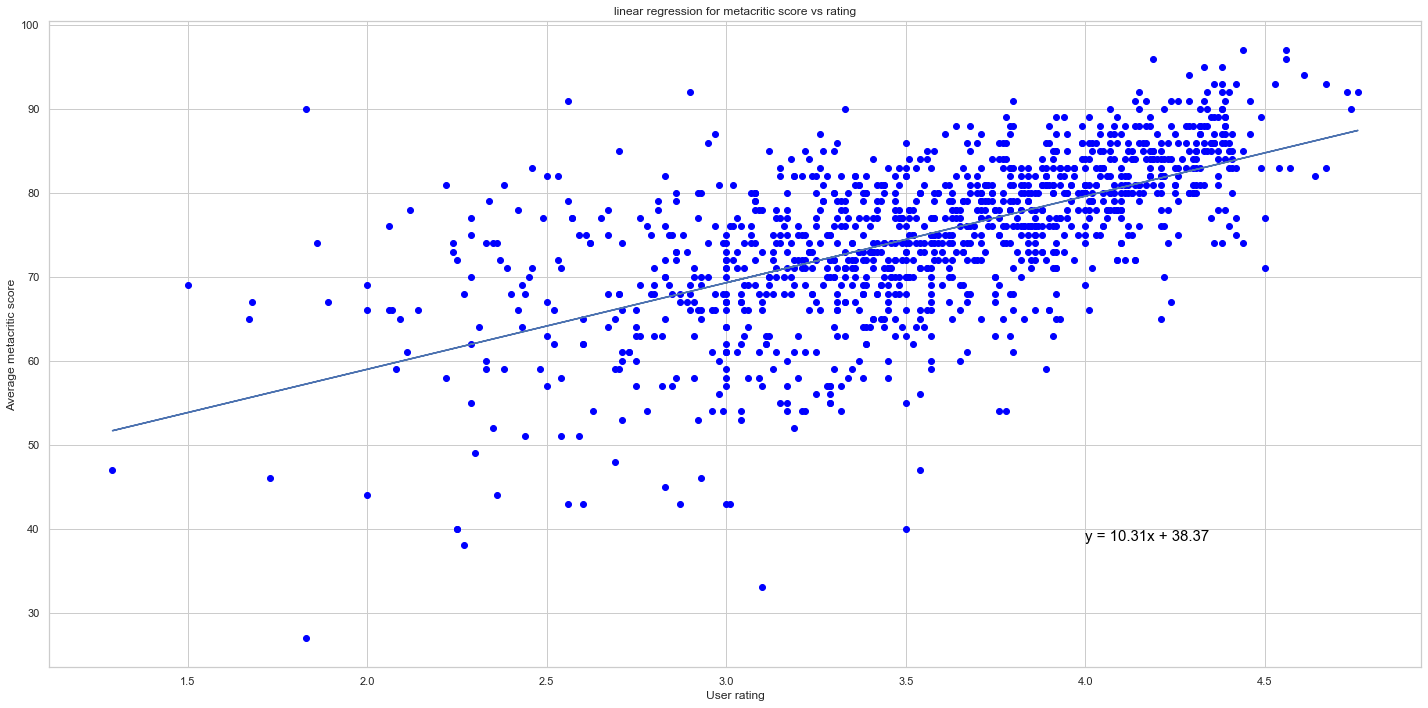

In [141]:
# user rating VS metacritic score
mean_rating = game_df.groupby(["name"])["rating"].mean()
mean_metascore = game_df.groupby(["name"])["metacritic score"].mean()

slope, intercept, rvalue, pvalue, stderror = st.linregress(mean_rating, mean_metascore)
linear = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Correlation coefficient is {round(rvalue,2)}")
print(f"Linear regression model is {linear}")

regression = mean_rating*slope + intercept
plt.figure(figsize=(20,10))
plt.annotate(linear, (4,38.6), fontsize=15, color="black")
plt.scatter(mean_rating, mean_metascore, color='blue')
plt.plot(mean_rating, regression)
plt.title("linear regression for metacritic score vs rating")
plt.xlabel("User rating")
plt.ylabel("Average metacritic score")
plt.tight_layout()

plt.savefig("figures/gamerating.png")

## Game platforms <a id='gameplatform'></a>

## Game genres <a id='gamegenre'></a>

In [95]:
# get the first genre of each game (treated as the main genre for further analysis)
genre=[]
for i in game_df.index:
    curr_genre=game_df.loc[i,"genres"].split("'")
    genre.append(curr_genre[1])

game_df["first genre"]=genre
game_df.head()

,name,id,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,...,yet,owned,beaten,toplay,dropped,playing,users,month,year,first genre
0,The Witcher 3: Wild Hunt,3328,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,...,562,6149,2405,455,424,593,9147,5,2015,Adventure
1,Life is Strange,3439,9,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,...,466,6156,1916,184,343,124,8196,1,2015,Adventure
2,Red Dead Redemption 2,28,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Adventure', 'Action']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,...,404,4230,1261,1143,219,588,6079,10,2018,Adventure
3,DOOM (2016),2454,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,...,318,4868,1526,319,370,222,6616,5,2016,Shooter
4,Fallout 4,3070,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,...,295,4844,1235,225,732,222,6301,11,2015,Action


In [96]:
# explore summary of rating by genre

genre_summary=pd.DataFrame(game_df.groupby("first genre")["rating"].agg(["count","mean","median","var","std","sem"]))
genre_summary

,count,mean,median,var,std,sem
first genre,,,,,,
Action,110,3.588727,3.675,0.379184,0.615779,0.058712
Adventure,201,3.667015,3.710,0.302801,0.550274,0.038813
Arcade,12,3.672500,3.720,0.110111,0.331830,0.095791
Card,6,3.703333,3.695,0.223227,0.472469,0.192885
Casual,72,3.566389,3.750,0.327508,0.572283,0.067444
Educational,4,3.260000,3.315,0.392200,0.626259,0.313129
Family,8,3.776250,3.710,0.108055,0.328718,0.116219
Fighting,5,3.740000,3.630,0.241000,0.490918,0.219545
Indie,364,3.425852,3.470,0.330796,0.575148,0.030146


In [117]:
# only examining genre that have at list 100 ratings
top_genre=genre_summary.index[genre_summary["count"]>100]
for i in game_df.index:
    if game_df.loc[i,"first genre"] in top_genre:
        game_df.loc[i,"top genre"]=True
    else:
        game_df.loc[i,"top genre"]=False

# get a shortened genre_df with only the top genres
game_df_shortgenre=game_df[game_df["top genre"]==True]
game_df_shortgenre

,name,id,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,...,owned,beaten,toplay,dropped,playing,users,month,year,first genre,top genre
0,The Witcher 3: Wild Hunt,3328,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,...,6149,2405,455,424,593,9147,5,2015,Adventure,True
1,Life is Strange,3439,9,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,...,6156,1916,184,343,124,8196,1,2015,Adventure,True
2,Red Dead Redemption 2,28,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Adventure', 'Action']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,...,4230,1261,1143,219,588,6079,10,2018,Adventure,True
4,Fallout 4,3070,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,...,4844,1235,225,732,222,6301,11,2015,Action,True
5,God of War,58175,1,['PlayStation'],1,['PlayStation Store'],2,"['Adventure', 'Action']","['Action-Adventure', 'Atmospheric', 'Blood', '...",2018-04-20,...,3861,1852,752,110,278,5991,4,2018,Adventure,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,Past Cure,51814,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Indie', 'Action']","['Full controller support', 'Steam Achievement...",2018-02-23,...,19,3,8,1,0,22,2,2018,Indie,True
1178,Troll and I,11272,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Adventure', 'Action']","['Full controller support', 'Steam Achievement...",2017-03-21,...,22,0,1,4,1,23,3,2017,Adventure,True
1179,FRAMED 2,29196,2,"['iOS', 'Android']",2,"['App Store', 'Google Play']",2,"['Adventure', 'Puzzle']","['Story', 'ship']",2017-06-14,...,7,10,7,1,0,17,6,2017,Adventure,True
1182,Ever Oasis,28023,1,['Nintendo'],1,['Nintendo Store'],2,"['Action', 'RPG']","['role-playing', 'exclusive', 'true exclusive']",2017-06-23,...,2,9,9,2,1,12,6,2017,Action,True


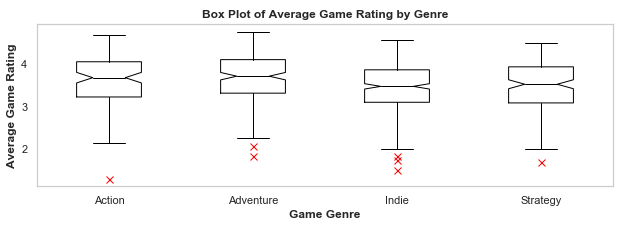

In [147]:
# visualising distribution of game rating in the top genres
game_df_shortgenre.boxplot("rating",by="first genre",figsize=(10,3),grid=False,\
                       notch=True,color="black",\
                       flierprops=dict(marker='x',markersize=7, markeredgecolor="red"))
plt.title("Box Plot of Average Game Rating by Genre",fontweight="bold")
plt.xlabel("Game Genre", fontweight="bold")
plt.ylabel("Average Game Rating", fontweight="bold")
plt.suptitle(" ")

plt.savefig("figures/gamerating_genre.png")

In [99]:
# one way anova across genre
rating=[]
curr_rating=[]
genre=[]

for i in game_df_shortgenre["first genre"].unique():
    curr_rating=game_df_shortgenre["rating"][game_df_shortgenre["first genre"]==i]
    rating.append(curr_rating)
    genre.append(i)

st.f_oneway(rating[0],rating[1],rating[2],rating[3])

F_onewayResult(statistic=8.348181198375165, pvalue=1.7934241967507945e-05)

The ANOVA was significant with a p-value of <0.001, suggesting that average game ratings do differ by game genre. As such, individual t-tests will be run across each pair of genres to find out which pair are driving the results. Alpha level is set at p=0.05/(number of tests) to control for multiple comparisons

In [100]:
numtests=0
for i in range(len(genre)-1):
    numtests=numtests+(i+1)

for i in range(len(genre)):
    for j in range(len(genre)):
        if genre[i]!=genre[j]:
            result=st.ttest_ind(rating[i],rating[j],equal_var=False)
            if result.pvalue<(0.05/numtests):
                print(genre[i]+" vs "+genre[j]+" - "+str(result))

Adventure vs Indie - Ttest_indResult(statistic=4.907156745875142, pvalue=1.3155925991001647e-06)
Adventure vs Strategy - Ttest_indResult(statistic=3.070586163722927, pvalue=0.0023136237430462143)
Indie vs Adventure - Ttest_indResult(statistic=-4.907156745875142, pvalue=1.3155925991001647e-06)
Strategy vs Adventure - Ttest_indResult(statistic=-3.070586163722927, pvalue=0.0023136237430462143)


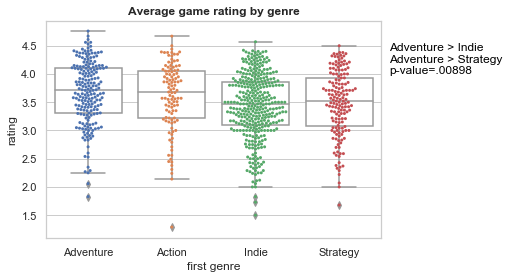

In [146]:
# plotting finding
import seaborn as sns

sns.set(style="whitegrid")
sns.despine()
fig1=sns.swarmplot("first genre","rating", data=game_df_shortgenre,size=3)
fig1=sns.boxplot("first genre","rating", data=game_df_shortgenre,color="white")
fig1.set_title("Average game rating by genre",fontweight="bold")
fig1.text(3.6,4,"Adventure > Indie\nAdventure > Strategy\np-value=.00898", horizontalalignment="left", size="medium", color='black')

plt.savefig("figures/gamerating_genre2.png")

The t-tests show that adventure genre tend to be rated higher than indie genre or strategy genre games.
The above analyses were rerun without outliers (below) and demonstrate a similar results, suggesting that significant difference in rating between genre is likely sound.

F_onewayResult(statistic=9.323737749419022, pvalue=4.573329240293672e-06)

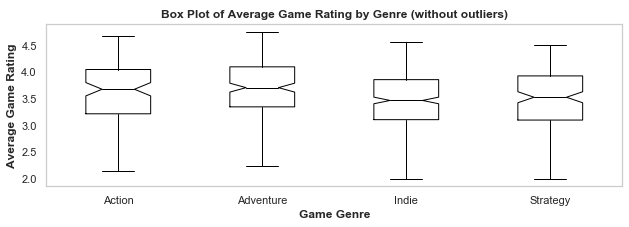

In [102]:
# testing whether results will be similar without outliers
game_df_shortgenre_nooutlier=g=game_df_shortgenre.copy()

for i in game_df_shortgenre["first genre"].unique():
    Q1=game_df_shortgenre["rating"][game_df_shortgenre["first genre"]==i].quantile(.25)
    Q3=game_df_shortgenre["rating"][game_df_shortgenre["first genre"]==i].quantile(.75)
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    for j in game_df_shortgenre_nooutlier.index:
        if (game_df_shortgenre_nooutlier.loc[j,"first genre"]==i) & (game_df_shortgenre_nooutlier.loc[j,"rating"]<lower_bound):
            game_df_shortgenre_nooutlier.loc[j,"outlier"]=True

game_df_shortgenre_nooutlier=game_df_shortgenre_nooutlier[game_df_shortgenre_nooutlier["outlier"]!=True]

game_df_shortgenre_nooutlier.boxplot("rating",by="first genre",figsize=(10,3),grid=False,\
                       notch=True,color="black",\
                       flierprops=dict(marker='x',markersize=7, markeredgecolor="red"))
plt.title("Box Plot of Average Game Rating by Genre (without outliers)",fontweight="bold")
plt.xlabel("Game Genre", fontweight="bold")
plt.ylabel("Average Game Rating", fontweight="bold")
plt.suptitle(" ")

rating_nooutlier=[]
curr_rating=[]
genre_nooutlier=[]

for i in game_df_shortgenre_nooutlier["first genre"].unique():
    curr_rating=game_df_shortgenre_nooutlier["rating"][game_df_shortgenre_nooutlier["first genre"]==i]
    rating_nooutlier.append(curr_rating)
    genre_nooutlier.append(i)

st.f_oneway(rating_nooutlier[0],rating_nooutlier[1],rating_nooutlier[2],rating_nooutlier[3])

Indie - y=0.0003x-206.9985
Strategy - y=0.0004x-307.5959


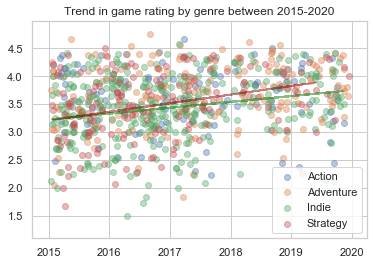

In [145]:
# to further explore how rating across genre differ over time, the following visualisations and linear regressions were run in the top 4 genres

fig, ax = plt.subplots()
for genre, group in game_df_shortgenre.groupby("first genre"):
    plt.scatter(group["release date"], group["rating"],alpha=0.4,label=genre)
ax.legend()
ax.set_title("Trend in game rating by genre between 2015-2020")

game_df["ordtime"]=game_df["release date"].map(dt.datetime.toordinal)

for i in game_df_shortgenre["first genre"].unique():
    (slope,intercept,rval,pval,stderror)=st.linregress(game_df["ordtime"][game_df["first genre"]==i],game_df["rating"][game_df["first genre"]==i])
    if pval<0.05/4:
        print(f'{i} - y={round(slope,4)}x{round(intercept,4)}')
        game_df[i]=slope*game_df["ordtime"][game_df["first genre"]==i]+intercept
        
plt.plot(game_df["release date"],game_df["Indie"],marker="",color="green",alpha=0.5)
plt.plot(game_df["release date"],game_df["Strategy"],marker="",color="darkred",alpha=0.5)

plt.savefig("figures/gamerating_genre_trend.png")